In [14]:
import os
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats  
from scipy.stats.stats import pearsonr
from google.colab import drive

In [2]:
drive.mount('mydrive') 

Mounted at mydrive


In [21]:
pokemon= pd.read_csv ("/content/mydrive/MyDrive/EDEM/PEP/All_Pokemon.csv", sep= ",", decimal = ".")
pokemon 


,Number,Name,Type 1,Type 2,Abilities,HP,Att,Def,Spa,Spd,Spe,BST,Mean,Standard Deviation,Generation,Experience type,Experience to level 100,Final Evolution,Catch Rate,Legendary,Mega Evolution,Alolan Form,Galarian Form,Against Normal,Against Fire,Against Water,Against Electric,Against Grass,Against Ice,Against Fighting,Against Poison,Against Ground,Against Flying,Against Psychic,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI
0,1,Bulbasaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",45,49,49,65,65,45,318,53.000000,8.640988,1.0,Medium Slow,1059860,0.0,45,0.0,0.0,0.0,0.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.7,6.9,14.1
1,2,Ivysaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",60,62,63,80,80,60,405,67.500000,8.902247,1.0,Medium Slow,1059860,0.0,45,0.0,0.0,0.0,0.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,13.0,13.0
2,3,Venusaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",80,82,83,100,100,80,525,87.500000,8.902247,1.0,Medium Slow,1059860,1.0,45,0.0,0.0,0.0,0.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.0,100.0,25.0
3,3,Mega Venusaur,Grass,Poison,['Thick Fat'],80,100,123,122,120,80,625,104.166667,18.747592,6.0,Medium Slow,1059860,1.0,45,0.0,1.0,0.0,0.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.4,155.5,27.0
4,4,Charmander,Fire,NaN,"['Blaze', 'Solar Power']",39,52,43,60,50,65,309,51.500000,8.995369,1.0,Medium Slow,1059860,0.0,45,0.0,0.0,0.0,0.0,1.0,0.5,2.0,1.0,0.50,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5,0.6,8.5,23.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,896,Glastrier,Ice,NaN,['Chilling Neigh'],100,145,130,65,110,30,580,96.666667,38.908725,8.0,Slow,1250000,1.0,3,1.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,1.00,0.5,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.2,800.0,165.3
1028,897,Spectrier,Ghost,NaN,['Grim Neigh'],100,65,60,145,80,130,580,96.666667,31.841622,8.0,Slow,1250000,1.0,3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.00,1.0,0.0,0.5,1.0,1.0,1.0,0.5,1.0,2.0,1.0,2.0,1.0,1.0,2.0,44.5,11.1
1029,898,Calyrex,Psychic,Grass,['Unnerve'],100,80,80,80,80,80,500,83.333333,7.453560,8.0,Slow,1250000,1.0,3,1.0,0.0,0.0,0.0,1.0,2.0,0.5,0.5,0.50,2.0,0.5,2.0,0.5,2.0,0.5,4.0,1.0,2.0,1.0,2.0,1.0,1.0,1.1,7.7,6.4
1030,898,Calyrex Ice Rider,Psychic,Ice,['As One'],100,165,150,85,130,50,680,113.333333,39.334746,8.0,Slow,1250000,1.0,3,1.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,1.00,0.5,1.0,1.0,1.0,1.0,0.5,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.4,809.1,140.5


In [39]:
res = pokemon["Catch Rate"].describe().round(3)
res

count    1032.000
mean       93.880
std        76.316
min         3.000
25%        45.000
50%        60.000
75%       127.000
max       255.000
Name: Catch Rate, dtype: float64

In [40]:
m  = res[1]
sd = res[2]
n  = res[0]
print("Mean:",m,"\n","Standard Deviation:",sd,"\n","N:",n)

Mean: 93.88 
 Standard Deviation: 76.316 
 N: 1032.0


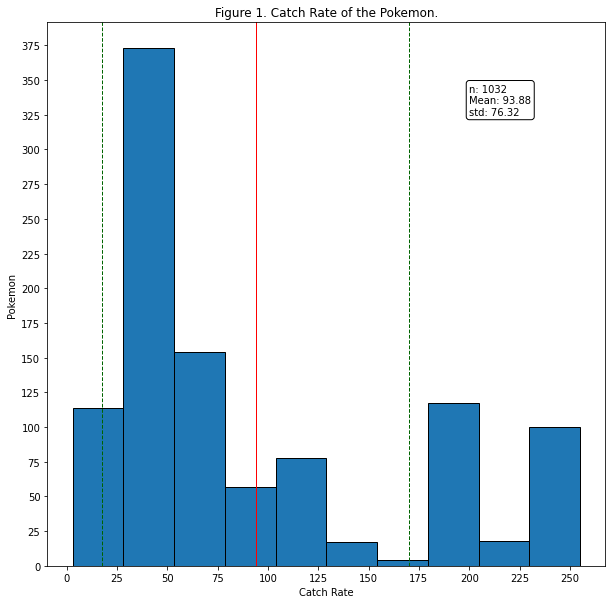

In [55]:
plt.figure(figsize=(10,10))
x=pokemon["Catch Rate"]
plt.hist (x, bins=10,edgecolor="black")
plt.title("Figure 1. Catch Rate of the Pokemon.")
plt.xlabel("Catch Rate")
plt.ylabel("Pokemon")
props = dict (boxstyle="round", facecolor ="white", lw =1)
plt.xticks(np.arange(0, 251, step=25))
plt.yticks(np.arange(0, 400, step=25))
plt.text(200, 325, "n: 1032" "\n" "Mean: 93.88" "\n" "std: 76.32", bbox=props)
plt.axvline(x=m, linewidth=1, linestyle= 'solid',color="red", label='Mean')
plt.axvline(x=(m+sd) , linewidth=1, linestyle= 'dashed',color="darkgreen", label='25%')
plt.axvline(x=(m-sd), linewidth=1, linestyle= 'dashed',color="darkgreen", label='75%')

In [23]:
x=pokemon["Catch Rate"]
y=pokemon.Mean
pearsonr (x,y)
r, p_val = pearsonr(x,y)
n = len(pokemon.Mean)
print('r:', round(r,3), 'P.Val:', round(p_val,3), 'n:', n)

r: -0.704 P.Val: 0.0 n: 1032


Text(100, 110, '$\\mathrm{r}=-0.70$\n$\\mathrm{P.Val:}=0.000$\n$\\mathrm{n}=1032$')

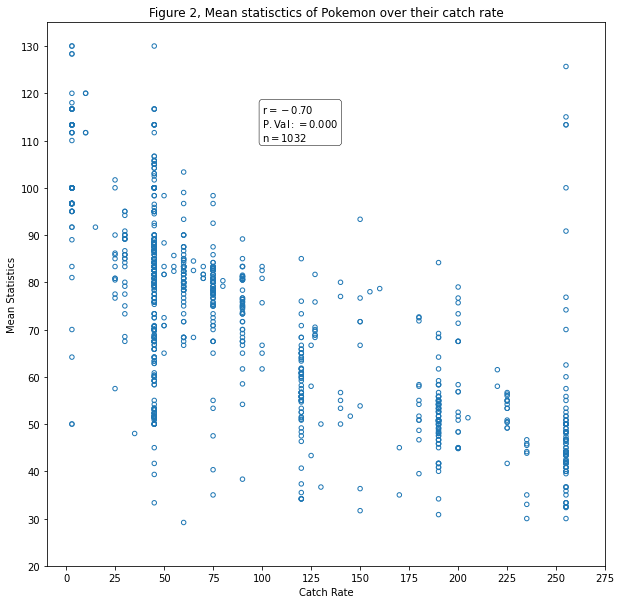

In [56]:
plt.figure(figsize=(10,10))
x=pokemon["Catch Rate"]
y=pokemon.Mean
plt.scatter (x, y, s=20, facecolors="none", edgecolors="C0")
plt.xticks(np.arange(0,300,step=25))
plt.yticks(np.arange(20,131,step=10))
plt.title("Figure 2, Mean statisctics of Pokemon over their catch rate")
plt.xlabel("Catch Rate")
plt.ylabel("Mean Statistics")
props =dict(boxstyle ="round", facecolor ="white", lw=0.5)
textstr = '$\mathrm{r}=%.2f$\n$\mathrm{P.Val:}=%.3f$\n$\mathrm{n}=%.0f$'%(r, p_val, n)
plt.text (100,110, textstr , bbox=props)